# Data Anaysis Project part1:


I am currently enrolled in a Google Data Analytics Professional Certificate course and plan to apply the skills and knowledge I am learning to my own data analysis project. This will allow me to solidify my understanding of the concepts and techniques taught in the course. 

#### Process to follow:
* Ask
* Prepare
* Process
* Analyze
* Share
* Act



## Overview of the project:

I am conducting an analysis of the rental housing market in Vancouver to identify popular rental properties in the area. Based on the results, I hope to find a valuable investment property and assess its value. I have chosen to focus on the Vancouver market because it is the one of the most wanted place in Canada, it offers a wide variety of properties, and large pool of potential investments to analyze. 


# ASK 

## Primery question to answer from this analysis:

### "What is the appropriate price to pay for your investment property in current economic condition? And why?"
    
    It's widely believed that Canadian real estate is overpriced, but what is the actual value of a property? To answer this question, I will evaluate property values based on current market conditions and determin the apporopriate price to pay for an investment property. This calculation involves several factors, but I will focus particularly on the revenue generation potential of the property, as this is a crucial aspect of any investment. By analyzing the revenue potential of a property, I aim to gain insight into its true value. 

#### Data source:

    Craigslist advertizement. Data started to collect since December 15, 2022. 

#### Questions to ask.
* Rental price by propety types.
* Rental price by area. 
* Number of advatizing by type of the property.
* Rental price trend.
* Correlation between housing price and rental price. And which way they are trending. 
* What is the short termand long term prediction.  


## Prepare  

### Collect the Data



In [1]:
# Import libralis
from requests import get
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import numpy as np

from time import sleep
import re
from random import randint
from warnings import warn
from time import time
from IPython.display import clear_output

In [2]:
class Url:
    def __init__(self, city_name, sub_city=None, num_post=0):
        self.city_name = city_name
        self.sub_city = sub_city
        self.num_post = num_post
        self.url = self.get_url()
        
    def get_url(self):
        if self.city_name == 'Abbotsford':
            url = f'https://{self.city_name.lower()}.craigslist.org/search/apa?s={self.num_post}sort=date&bundleDuplicates=1&min_price=&max_price=&availabilityMode=0&sale_date=all+dates'
        else:
            url = f'https://{self.city_name.lower()}.craigslist.org/search/{self.sub_city}/apa?s={self.num_post}sort=date&bundleDuplicates=1&min_price=&max_price=&availabilityMode=0&sale_date=all+dates'
        return url 

In [3]:
# Vanvouver rental housing
url = Url("Vancouver", 'van')
url_ = url.url

response = get(url_)


soup = BeautifulSoup(response.text, 'html.parser')

posts = soup.find_all('li', class_='result-row')
print(type(posts)) # to double check that I got resultSet
print(len(posts)) # to double check I got 120 elements

<class 'bs4.element.ResultSet'>
128


In [4]:
%%time
# Find the total number of posts to find the limit of the pagination
city = 'Vancouver'
sub_city = 'van'
response = get(url_)
soup = BeautifulSoup(response.text, 'html.parser')
posts = soup.find_all('li', class_='result-row')
results_num = soup.find('div', class_='search-legend')
results_total = int(results_num.find('span', class_='totalcount').text)
print(f"Total number of search result: {results_total}")

# each page has 119 posts so each new page is defined as follows; s=120, s=240, .....
pages = np.arange(0, results_total+1, 120)

iterations = 0

post_date = []
post_cities = []
num_bedroom = []
sqfts = []
prices = []
post_titles = []
post_links = []

for page in pages:
    
    # get request
    url = Url(city_name=city, sub_city=sub_city, num_post=page)
    url_ = url.url
    response = get(url_)
    
    sleep(1)
    
    # throw warning for status code that are not 200
    if response.status_code != 200:
        warn(f'Request: {requests}; Status code: {response.status_code}')
        
    soup = BeautifulSoup(response.text, 'html.parser')
    
    posts = soup.find_all('li', class_='result-row')
    
    
    # Extract data 
    for post in posts:
        
        if post.find('span', class_ = 'result-hood') is not None:
            
            # Posting date
            post_datetime = post.find('time', class_='result-date')['datetime']
            post_date.append(post_datetime)
            
            # Neighbourhoods
            post_city = post.find('span', class_='result-hood').text.strip('( )')
            post_cities.append(post_city)
            
            # title text
            post_title = post.find('a', class_='result-title hdrlnk')
            post_title_text = post_title.text
            post_titles.append(post_title_text)
            
            # Post price in integer
            price = int(post.find('span', class_='result-price').text.split('$')[1].replace(',', ''))
            prices.append(price)
            
            # Post link
            post_link = post_title['href']
            post_links.append(post_link)
            
            if post.find('span', class_ = 'housing') is not None:
                
                #if the first element is accidentally square footage
                if 'ft2' in post.find('span', class_ = 'housing').text.split()[0]:
                    
                    #make bedroom nan
                    bedroom_count = np.nan
                    num_bedroom.append(bedroom_count)
                    
                    #make sqft the first element
                    sqft = int(post.find('span', class_ = 'housing').text.split()[0][:-3])
                    sqfts.append(sqft)
                    
                #if the length of the housing details element is more than 2
                elif len(post.find('span', class_ = 'housing').text.split()) > 2:
                    
                    #therefore element 0 will be bedroom count
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    num_bedroom.append(bedroom_count)
                    
                    #and sqft will be number 3, so set these here and append
                    sqft = int(post.find('span', class_ = 'housing').text.split()[2][:-3])
                    sqfts.append(sqft)
                    
                #if there is num bedrooms but no sqft
                elif len(post.find('span', class_ = 'housing').text.split()) == 2:
                    
                    #therefore element 0 will be bedroom count
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    num_bedroom.append(bedroom_count)
                    
                    #and sqft will be number 3, so set these here and append
                    sqft = np.nan
                    sqfts.append(sqft)                    
                
                else:
                    bedroom_count = np.nan
                    num_bedroom.append(bedroom_count)
                
                    sqft = np.nan
                    sqfts.append(sqft)
                
            #if none of those conditions catch, make bedroom nan, this won't be needed    
            else:
                bedroom_count = np.nan
                num_bedroom.append(bedroom_count)
                
                sqft = np.nan
                sqfts.append(sqft)
            #    num_bedroom.append(bedroom_count)
                
            #    sqft = np.nan
            #    sqfts.append(sqft)
        iterations += 1
        #print("Page" + str(iterations) + "Scraped Successfully!")   

Total number of search result: 3000
CPU times: total: 4.27 s
Wall time: 49.1 s


In [91]:
# create DataFrame
df = pd.DataFrame({'Post Datetime': post_date,
                   'City Code': city.upper()[:3],
                   'Area Code': sub_city.upper(),
                   'Post Title': post_titles,
                   'Post URL': post_links,
                  'Neighborhood': post_cities,
                  'Bedroom': num_bedroom,
                  'SQFT': sqfts,
                  'Price': prices})

print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Post Datetime  3066 non-null   object 
 1   City Code      3066 non-null   object 
 2   Area Code      3066 non-null   object 
 3   Post Title     3066 non-null   object 
 4   Post URL       3066 non-null   object 
 5   Neighborhood   3066 non-null   object 
 6   Bedroom        2828 non-null   object 
 7   SQFT           2721 non-null   float64
 8   Price          3066 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 215.7+ KB
None


,Post Datetime,City Code,Area Code,Post Title,Post URL,Neighborhood,Bedroom,SQFT,Price
0,2022-12-23 19:41,VAN,VAN,Prosprise Realty* 2bed 1bath condo for rent! R...,https://vancouver.craigslist.org/van/apa/d/van...,Vancouver,2,910.0,3400
1,2022-12-23 19:40,VAN,VAN,"Beautiful 2BR, 2Baths with a den available now.",https://vancouver.craigslist.org/van/apa/d/van...,Mount Pleasant,2,815.0,3485
2,2022-12-23 19:33,VAN,VAN,Elegant Newly Renovated 2 Bed 2 Bath 26th Floo...,https://vancouver.craigslist.org/van/apa/d/ele...,1239 West Georgia,2,800.0,3690
3,2022-12-23 19:33,VAN,VAN,Elegant 1 Bed at Electric Avenue-Available Jan...,https://vancouver.craigslist.org/van/apa/d/van...,938 Smithe Street Downtown Vancouver,1,600.0,2200
4,2022-12-23 19:23,VAN,VAN,Furnished Coal Harbour 2 bedrm 2 bathrm for rent,https://vancouver.craigslist.org/van/apa/d/van...,Vancouver,2,1100.0,4150



## Process

* Clean data
    * Remove duplecates.
    * If the number of bed room is NaN, assume it is bachelor suite (number of bedroom as 0)
    * Convert Post Datetime object to Datetime, then seperate Date and Time. 
    * Sort the dataFrame by Post Datetime. 
    * Convert number of bedroom string to integer. 
* Add parameters to analyze data
    * Specific neighbourhood and clean up messy neighbourhoode. 
    * Post area code connecting the city name and area name to distinguish different area in future with other data. 
    * Calcualte Price/SQFT
    * Find out if the suite is furnished or not by finding the key word "Furnished" in the post title. 
    * Seperate the data by SQFT/Price price range. gategory 1 to 4, which 1 is cheap and 4 is expensive. 

### I am trying to identify the area if the address is provided. 

In [92]:
# Get all the Nighborhood start with number, I assume those are address. Then identify the area using google geocoding API.
address = []
for string in df["Neighborhood"].unique():
    if string[0].isdigit():
        address.append(string)
address

['1239 West Georgia',
 '938 Smithe Street Downtown Vancouver',
 '1022 Nelson Street, Vancouver, BC',
 '8290 Montcalm St.',
 '777 Richards. St. Vancouver',
 '1342 Camridge Road',
 '777 Richards St and Robson St',
 '1228 W Hastings Street / Downtown Vancouver',
 '1644 NELSON ST.',
 '8129 Shaughnessy Street',
 '1283 Howe Street',
 '389 West 59th',
 '1238 Melville Street, Vancouver',
 '1803-1483 Homer St, Vancouver, BC',
 '166 E. 20th Ave, Vancouver, BC',
 '6 - 3551 Kingsway, Vancouver, BC',
 '1281 WEST CORDOVA ST. VANCOUVER, B.C.',
 '455 Abbott Street, Vancouver, BC.',
 '1009 HARWOOD ST',
 '2338 Orchard Ln',
 '1068 hornby st',
 '1199 Seymour Street Vancouver',
 '777 Richards Street Vancouver, B.C.',
 '1708 Ontario Street, Vancouver BC',
 '1026 West 13th Avenue, Vancouver',
 '282 West 44th Avenue, Vancouver',
 '2615 Columbia Street, Vancouver, BC',
 '747 E 3rd St North Vancouver, BC V7L 1G8',
 '19xx Quilchena Crescent',
 '26xx W. King Edward Ave.',
 '7638 Cambie Street',
 '905 E 41st AVE, 

If Neighborhood starts with number, then check the area name with google geocoding API. 

if Neighborhood is area name, then use as area name.

clean up all the Neighborhood - cut , / and show same thing but differently. Also, make all lower case. 

In [93]:
# Convert Datetime then split seperate columns
df['Post Datetime'] = pd.to_datetime(df["Post Datetime"])
df['Post Date'] = df['Post Datetime'].dt.date
df['Post Time'] = df['Post Datetime'].dt.time

df["PostAreaCode"] = df["City Code"] + df["Area Code"]

lower_neighbor = []
for area in df["Neighborhood"]:
    neighbor = area.lower()
    lower_neighbor.append(neighbor)
df["Neighborhood"] = lower_neighbor

df = df[["PostAreaCode", 'Post Datetime', 'Post Date', 'Post Time', 'Post Title', 'Post URL', 'Neighborhood', 'Bedroom', 'SQFT', 'Price']]
df.head()

,PostAreaCode,Post Datetime,Post Date,Post Time,Post Title,Post URL,Neighborhood,Bedroom,SQFT,Price
0,VANVAN,2022-12-23 19:41:00,2022-12-23,19:41:00,Prosprise Realty* 2bed 1bath condo for rent! R...,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,2,910.0,3400
1,VANVAN,2022-12-23 19:40:00,2022-12-23,19:40:00,"Beautiful 2BR, 2Baths with a den available now.",https://vancouver.craigslist.org/van/apa/d/van...,mount pleasant,2,815.0,3485
2,VANVAN,2022-12-23 19:33:00,2022-12-23,19:33:00,Elegant Newly Renovated 2 Bed 2 Bath 26th Floo...,https://vancouver.craigslist.org/van/apa/d/ele...,1239 west georgia,2,800.0,3690
3,VANVAN,2022-12-23 19:33:00,2022-12-23,19:33:00,Elegant 1 Bed at Electric Avenue-Available Jan...,https://vancouver.craigslist.org/van/apa/d/van...,938 smithe street downtown vancouver,1,600.0,2200
4,VANVAN,2022-12-23 19:23:00,2022-12-23,19:23:00,Furnished Coal Harbour 2 bedrm 2 bathrm for rent,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,2,1100.0,4150


In [94]:
# Convert Bedroom number strings to Integer then NaN value to 0 assume 0 bedroom is studio appartment. 
df["Bedroom"] = pd.to_numeric(df["Bedroom"], errors='ignore').astype('Int64')
df["Bedroom"] = df["Bedroom"].fillna(0)

In [95]:
%%time
# Check if word 'furnished' in the title post. 
search_word = 'furnished'
furnished = []
for i in range(len(df)):
    post_title_list = df['Post Title'][i].lower().split(" ")
    if any(word == search_word for word in post_title_list):
        furnished.append(True)
    else:
        furnished.append(False)
df["IsFurnished"] = furnished

CPU times: total: 0 ns
Wall time: 13.8 ms


#### Clean up the neighborhood. 

In [96]:
# After split neighborhood to list, back to one string
def back_to_string(word_list):
    neighbour = ''
    
    for word in word_list:
        neighbour += (word + ' ')
    return neighbour

neighourhood = []
for i in range(len(df)):
    neighbor_word_list = df["Neighborhood"][i].replace(',', ' ').replace('/', ' ').split(" ")
    if 'yaletown' in neighbor_word_list:
        neighbor = 'yaletown'
    elif 'downtown' in neighbor_word_list:
        neighbor = 'downtown'
    elif 'dt' in neighbor_word_list:
        neighbor = 'downtown'
    #elif "west" and 'vancouver' in neighbor_word_list:
     #   neighbor = 'west vancouver'
    elif 'city' and 'vancouver' in neighbor_word_list:
        neighbor = 'vancouver'
    elif 'west' and 'end' in neighbor_word_list:
        neighbor = 'west end'
    elif len(neighbor_word_list) > 4:
        neighbor = 'vancouver'
    else:
        neighbor = back_to_string(neighbor_word_list)
    neighourhood.append(neighbor)
df['Neighborhood'] = neighourhood

Get the per SQFT price. Then categorize the dataframe by price.

In [97]:
df["Price/SQFT"] = df["Price"] / df["SQFT"]
df['Price/SQFT'].fillna(0, inplace=True)
p_per_sqft_df = df[["Neighborhood", "Bedroom", "Price", "Price/SQFT"]].sort_values(by="Price/SQFT", ascending=False)

In [102]:
df['Price/SQFT'].describe()

count    2622.000000
mean        4.657401
std        34.072562
min         0.000000
25%         2.902273
50%         3.967460
75%         4.861899
max      1650.000000
Name: Price/SQFT, dtype: float64

In [ ]:
df['price_range'] = pd.cut(df['Price/SQFT'], bins=[-1, 0.5, 3.4, 4.2, 5.8, 13], labels=[0, 1, 2, 3, 4], include_lowest=False)

In [98]:
# Sort DataFrame by Datetime
df.sort_values(by="Post Datetime", axis=0, ascending=False, inplace=True)

In [99]:
# Remove duplicates by post title
df.drop_duplicates(subset="Post Title", inplace=True)
len(df)

2622

In [100]:
# Number of DataFrame after removing duplicates
len(df)

2622

## Understanding the Data

Use visualization to understand the data. 



In [101]:
import matplotlib.pyplot as plt
plt.rcParams.update({"figure.figsize": (10, 6), "figure.dpi": 120})

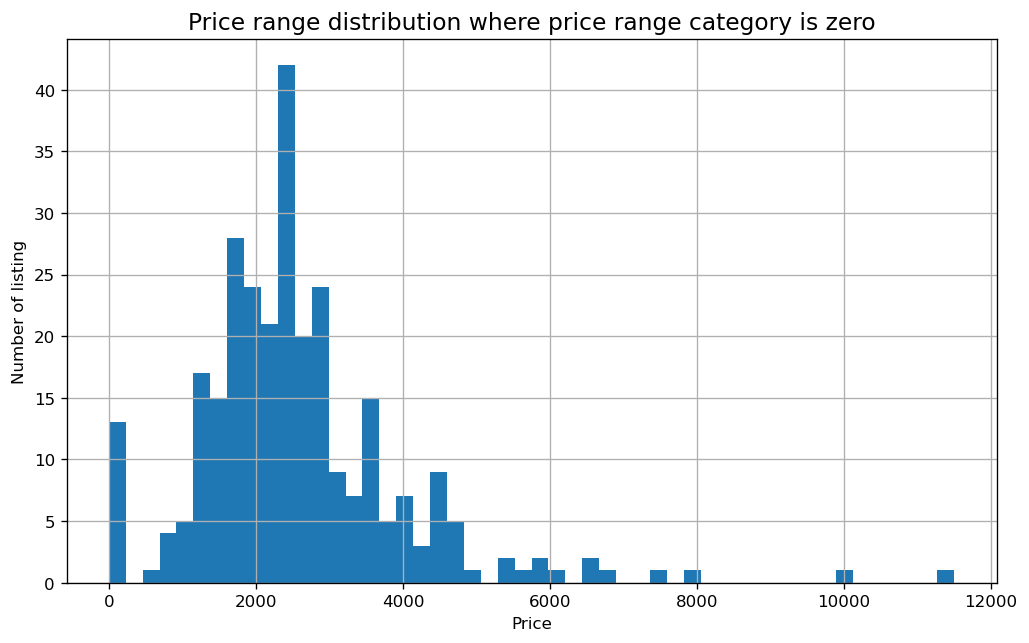

In [139]:
df[df['price_range'] == 0]['Price'].hist(bins=50)
plt.title('Price range distribution where price range category is zero', fontsize=14)
plt.xlabel("Price")
plt.ylabel('Number of listing');

In [24]:
# First, show the highest price of the ads. 
df.sort_values(by='Price', ascending=False).head()

,PostAreaCode,Post Datetime,Post Date,Post Time,Post Title,Post URL,Neighborhood,Bedroom,SQFT,Price,IsFurnished,Price/SQFT
2152,VANVAN,2022-12-12 10:56:00,2022-12-12,10:56:00,Ultra Customized Morden Luxury House In West P...,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,4,3958.0,25000,False,6.316321
1246,VANVAN,2022-12-20 11:11:00,2022-12-20,11:11:00,Furnished Two Bedroom Sub-Penthouse at Shangri...,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,2,2694.0,25000,True,9.279881
612,VANVAN,2022-12-22 09:51:00,2022-12-22,09:51:00,Luxury Furnished 3 Bed + Den 4 Bath Condo at T...,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,3,2223.0,24995,True,11.243815
1387,VANVAN,2022-12-19 12:19:00,2022-12-19,12:19:00,Furnished luxury Mansion 7 bed/7 bath availabl...,https://vancouver.craigslist.org/van/apa/d/wes...,vancouver,6,10000.0,22880,True,2.288000
2038,VANVAN,2022-12-13 08:57:00,2022-12-13,08:57:00,Coal Harbour Luxury Three Bedroom Apartment,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,3,3636.0,20000,False,5.500550


In [26]:
#I found outlier so I drop it to start. 
df.drop(df[df["Price"] == 500000].index, axis=0, inplace=True)

## Price distribution

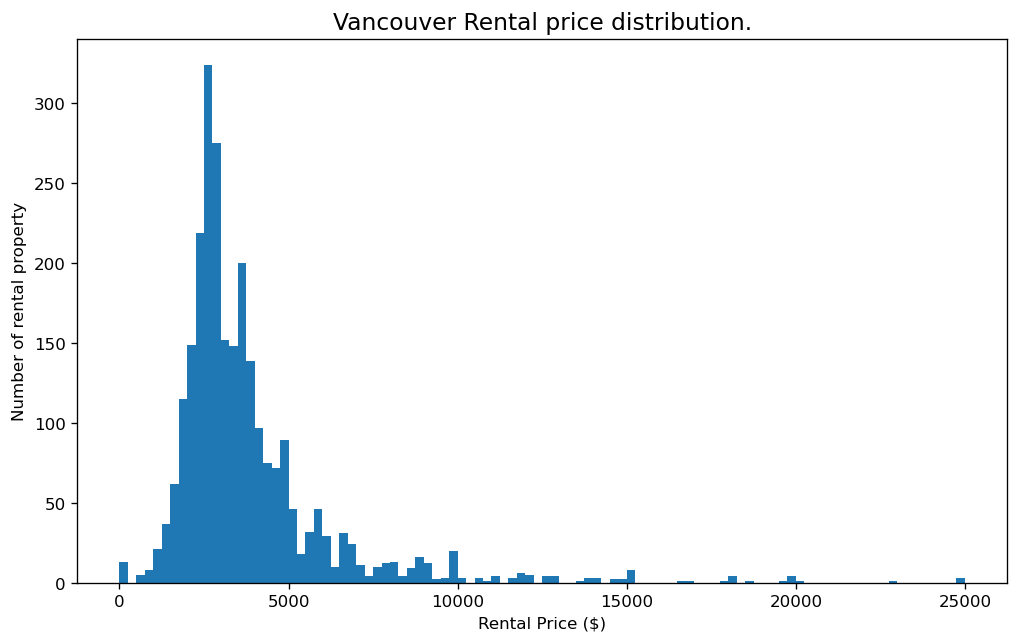

In [27]:
plt.hist(df["Price"], bins=100)
plt.title(f'{city} Rental price distribution.', fontsize=14)
plt.xlabel("Rental Price ($)")
plt.ylabel("Number of rental property");

## Relationship between Price and SQFT

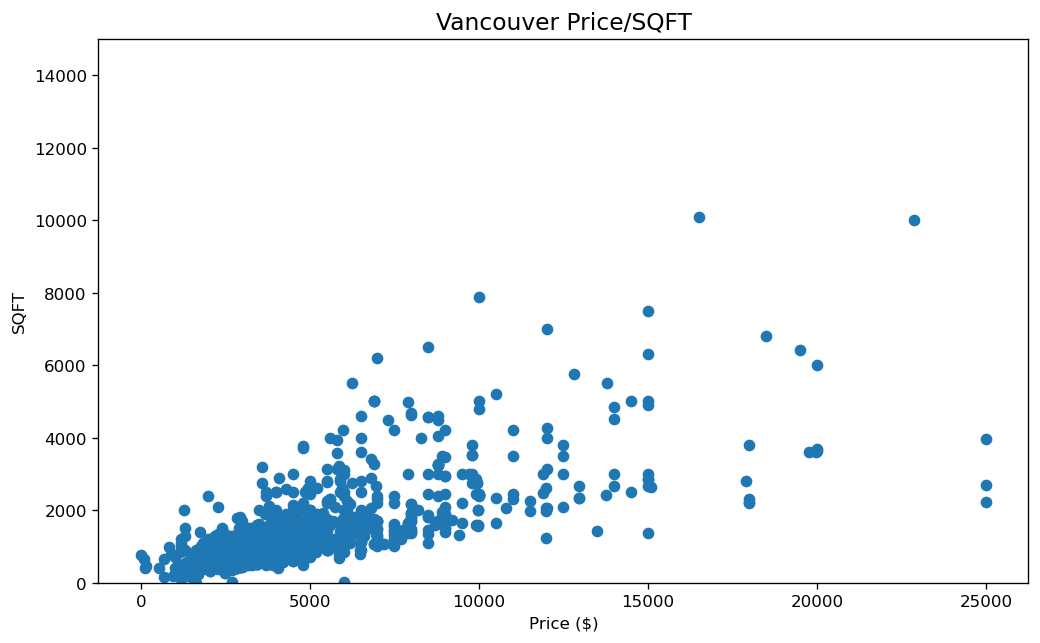

In [20]:
# Relationship between SQFT and Price
plt.scatter(x=df["Price"], y=df["SQFT"])
plt.ylim((0, 15000))
plt.title(f"{city} Price/SQFT", fontsize=14)
plt.xlabel(f"Price ($)")
plt.ylabel(f"SQFT");

In [22]:
# Drop rows if sqft is zero
p_per_sqft_df.fillna(0, inplace=True)
no_sqft_idx = p_per_sqft_df[p_per_sqft_df["Price/SQFT"] == 0].index
p_per_sqft_df.drop(no_sqft_idx, axis=0, inplace=True)

In [23]:
# Drop rows if Price/SQFT > $20
p_per_sqft_df = p_per_sqft_df[p_per_sqft_df["Price/SQFT"] < 20]

## Distribution of Per SQFT Price

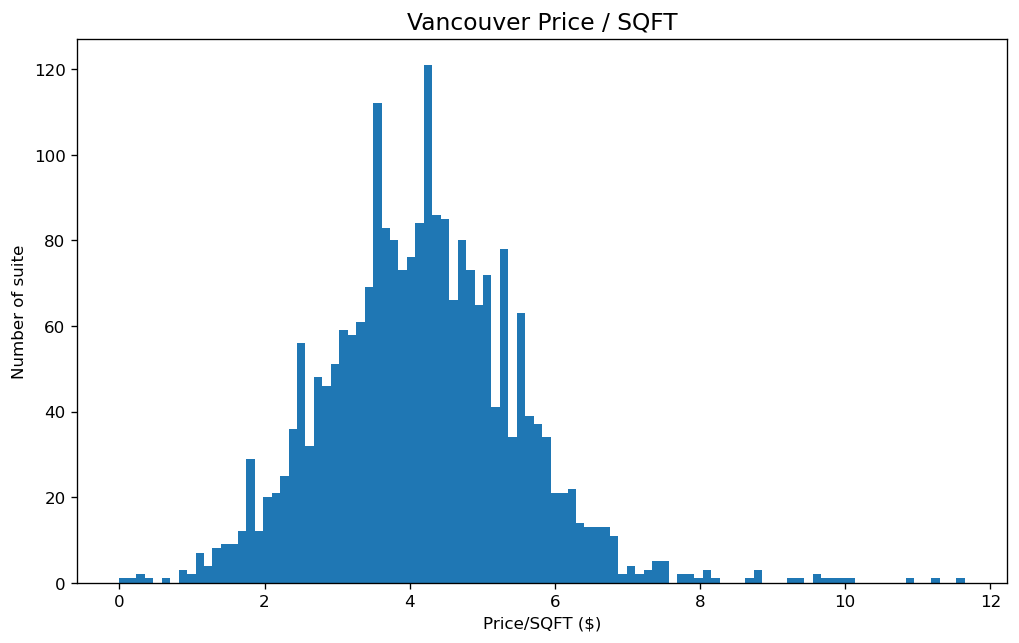

In [24]:
plt.hist(p_per_sqft_df["Price/SQFT"], bins=100)
plt.title(f"{city} Price / SQFT", fontsize=14)
plt.xlabel("Price/SQFT ($)")
plt.ylabel("Number of suite");

0
count    288.000000
mean       0.004084
std        0.035858
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.386049
Name: Price/SQFT, dtype: float64

1
count    613.000000
mean       2.627383
std        0.586058
min        0.640000
25%        2.288000
50%        2.754491
75%        3.111111
max        3.400000
Name: Price/SQFT, dtype: float64

2
count    574.000000
mean       3.791969
std        0.233421
min        3.406818
25%        3.587419
50%        3.782760
75%        4.000000
max        4.200000
Name: Price/SQFT, dtype: float64

3
count    930.000000
mean       4.873750
std        0.455260
min        4.200323
25%        4.473684
50%        4.811321
75%        5.252462
max        5.800000
Name: Price/SQFT, dtype: float64

4
count    214.000000
mean       6.665793
std        1.037823
min        5.802220
25%        6.000000
50%        6.320856
75%        6.816037
max       11.650485
Name: Price/SQFT, dtype: float64



2619

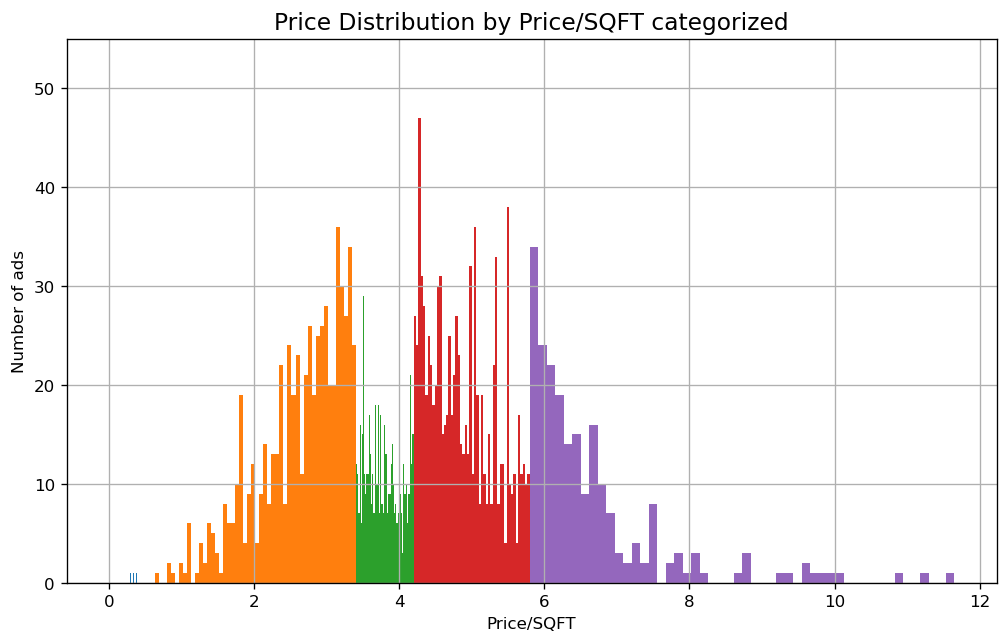

In [140]:
df_grouped = df.groupby('price_range')

number_row = 0
# Print data frame, lenth of data by category
for name, group in df_grouped:
    print(name)
    group['Price/SQFT'].hist(bins=50)
    plt.ylim(0, 55)
    plt.title("Price Distribution by Price/SQFT categorized", fontsize=14)
    plt.xlabel('Price/SQFT')
    plt.ylabel('Number of ads')
    print(group["Price/SQFT"].describe())
    number_row += len(group)
    print()
number_row

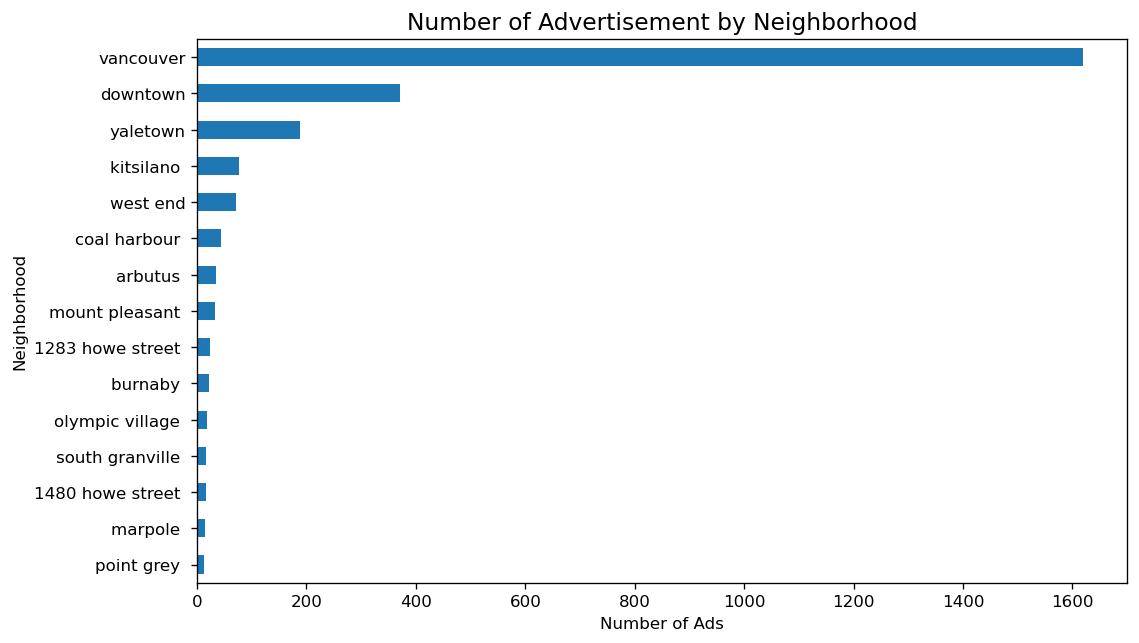

In [144]:
top_15_ads_count_by_area = p_per_sqft_df["Neighborhood"].value_counts().head(15).sort_values(ascending=True)
top_15_ads_count_by_area.plot(kind='barh')
plt.title('Number of Advertisement by Neighborhood', fontsize=14)
plt.xlabel('Number of Ads')
plt.ylabel("Neighborhood");

In [26]:
# Drop all of the neighborhood is 1. 
p_per_neighbor = p_per_sqft_df.groupby(by="Neighborhood").agg({"Price/SQFT": ['count', 'mean', 'min', 'max']})
p_per_neighbor['Price/SQFT'].sort_values(by='count', ascending=False).head(15)

,count,mean,min,max
Neighborhood,,,,
vancouver,1241,3.992613,0.153846,11.650485
downtown,282,4.984281,0.001325,10.877447
yaletown,153,4.848903,1.842308,8.097166
kitsilano,65,3.997358,1.090909,6.211111
west end,49,5.097257,3.406818,9.420796
coal harbour,40,4.474458,2.765152,6.925743
mount pleasant,26,4.383676,2.227273,5.808758
burnaby,20,3.450432,2.093023,4.672897
olympic village,19,4.468176,3.044456,5.849057


## Number of ads on each bedroom

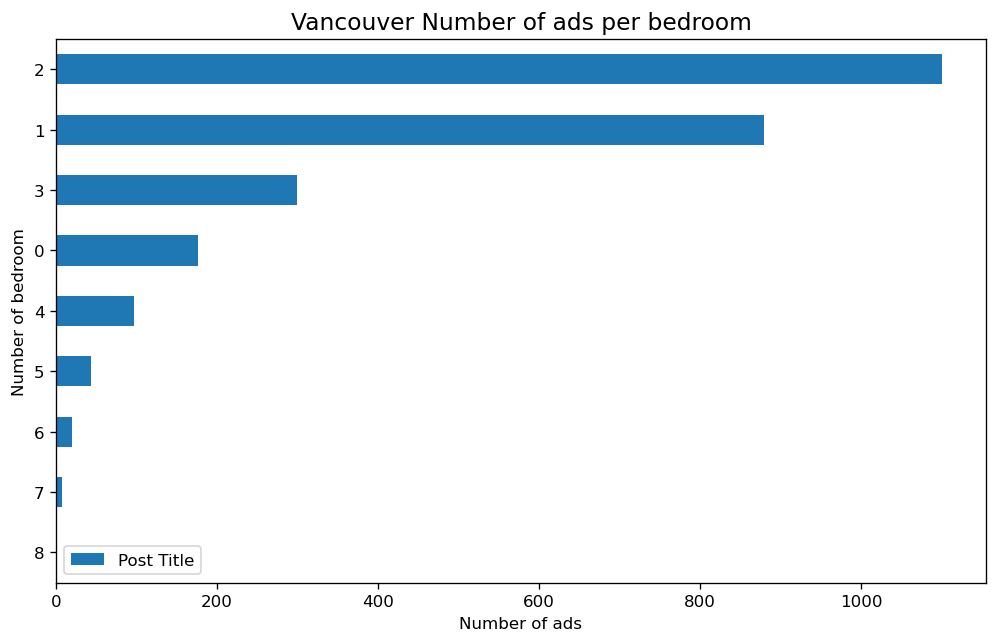

In [27]:
num_bed = df.groupby('Bedroom').agg({'Post Title': 'count'}).sort_values(by='Post Title', ascending=True)
num_bed.plot(kind='barh')
plt.title(f"{city} Number of ads per bedroom", fontsize=14)
plt.xlabel("Number of ads")
plt.ylabel("Number of bedroom");

In [28]:
# Percentage of the number of listing. 
num_bed["percent"] = num_bed / len(df) * 100
num_bed.rename(columns={'Post Title': "Number of Ads", 'percent': 'Percentage'}, inplace=True)

In [29]:
num_bed

,Number of Ads,Percentage
Bedroom,,
8,1,0.038124
7,7,0.266870
6,20,0.762486
5,44,1.677469
4,97,3.698056
0,176,6.709874
3,299,11.399161
1,879,33.511247
2,1100,41.936714


In [30]:
# Price less than $300
df[df['Price'] < 300]

,PostAreaCode,Post Datetime,Post Date,Post Time,Post Title,Post URL,Neighborhood,Bedroom,SQFT,Price,IsFurnished,Price/SQFT
178,VANVAN,2022-12-23 08:17:00,2022-12-23,08:17:00,Westsea Place - (Westend) - Studio & 1 Bedroom...,https://vancouver.craigslist.org/van/apa/d/del...,1644 nelson st.,0,NaN,0,False,NaN
833,VANVAN,2022-12-21 14:39:00,2022-12-21,14:39:00,scam! beware 1 bdrm in freesia building downto...,https://vancouver.craigslist.org/van/apa/d/van...,downtown,1,755.0,1,False,0.001325
1586,VANVAN,2022-12-17 15:59:00,2022-12-17,15:59:00,Need help with housing,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,0,NaN,1,False,NaN
1644,VANVAN,2022-12-16 18:53:00,2022-12-16,18:53:00,New basement suite in Riley Park Neighbourhood,https://vancouver.craigslist.org/van/apa/d/van...,riley park,1,NaN,140,False,NaN
2015,VANVAN,2022-12-13 11:30:00,2022-12-13,11:30:00,DO NOT LIVE HERE - 124 DUNLEVY AVE,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,0,NaN,0,False,NaN
2131,VANVAN,2022-12-12 13:20:00,2022-12-12,13:20:00,Vancouver Furnished Master Bedroom for Rent,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,1,400.0,120,True,0.300000
2439,VANVAN,2022-12-08 14:02:00,2022-12-08,14:02:00,DO NOT RENT 1310 WEST 10TH AVE,https://vancouver.craigslist.org/van/apa/d/van...,fairview,1,NaN,0,False,NaN
2549,VANVAN,2022-12-06 21:27:00,2022-12-06,21:27:00,Sublet available Vancouver Dec 19th to Jan 2nd,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,1,NaN,90,False,NaN
2630,VANVAN,2022-12-06 01:57:00,2022-12-06,01:57:00,No Cooking is Illegal,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,1,NaN,0,False,NaN
2803,VANVAN,2022-12-04 15:12:00,2022-12-04,15:12:00,DT One Bedroom One Bath Furnished Dec 21-29 2022,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,1,650.0,100,True,0.153846


This post is daily rental. From this, I assume teh rental price around $100 would be daily rental suite. 

What about $1 or $0 posts?

In [31]:
# $1 ads
one_dollar = df[df["Price"] == 1]
one_dollar["Post URL"]

833     https://vancouver.craigslist.org/van/apa/d/van...
1586    https://vancouver.craigslist.org/van/apa/d/van...
Name: Post URL, dtype: object

In [32]:
# $0 ads
zero_dollar = df[df["Price"] == 0]
zero_dollar

,PostAreaCode,Post Datetime,Post Date,Post Time,Post Title,Post URL,Neighborhood,Bedroom,SQFT,Price,IsFurnished,Price/SQFT
178,VANVAN,2022-12-23 08:17:00,2022-12-23,08:17:00,Westsea Place - (Westend) - Studio & 1 Bedroom...,https://vancouver.craigslist.org/van/apa/d/del...,1644 nelson st.,0,NaN,0,False,NaN
2015,VANVAN,2022-12-13 11:30:00,2022-12-13,11:30:00,DO NOT LIVE HERE - 124 DUNLEVY AVE,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,0,NaN,0,False,NaN
2439,VANVAN,2022-12-08 14:02:00,2022-12-08,14:02:00,DO NOT RENT 1310 WEST 10TH AVE,https://vancouver.craigslist.org/van/apa/d/van...,fairview,1,NaN,0,False,NaN
2630,VANVAN,2022-12-06 01:57:00,2022-12-06,01:57:00,No Cooking is Illegal,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,1,NaN,0,False,NaN


I think it most likely 0 dollar and 1 dollar ads are just not showing the price, so I will drop those rows from DataFrame. 

In [33]:
# Drop low-end outliers rows
drop_index = []
for idx in one_dollar.index:
    drop_index.append(idx)
for idx in zero_dollar.index:
    drop_index.append(idx)
print(f"Original DataFrame Size:{len(df)}\nNumber of Dropped Rows: {len(drop_index)}")
df.drop(drop_index,axis=0, inplace=True)
print(f"DataFrame size after drop rows: {len(df)}")

Original DataFrame Size:2623
Number of Dropped Rows: 6
DataFrame size after drop rows: 2617


## Analyze - 1

From the Histgram, the highest amount of rental is between 1000 to 5000. First I look what kind of market above 5000. 

I call this as 

## High-End market research


In [34]:
# top 100 higest price 
top_100_price = df[['Post Datetime', 'Neighborhood', 'Bedroom', 'SQFT', 'Price', 'IsFurnished']].sort_values(
                by="Price", ascending=False).head(100)
top_100_price.head(30)


,Post Datetime,Neighborhood,Bedroom,SQFT,Price,IsFurnished
2147,2022-12-12 10:56:00,vancouver,4,3958.0,25000,False
1203,2022-12-20 11:11:00,vancouver,2,2694.0,25000,True
535,2022-12-22 09:51:00,vancouver,3,2223.0,24995,True
1355,2022-12-19 12:19:00,vancouver,6,10000.0,22880,True
2032,2022-12-13 08:57:00,vancouver,3,3636.0,20000,False
367,2022-12-22 15:46:00,dowtown,4,3700.0,19998,False
157,2022-12-23 09:06:00,vancouver,7,6000.0,19995,True
142,2022-12-23 09:30:00,vancouver,3,3600.0,19975,False
368,2022-12-22 15:46:00,vancouver,3,3600.0,19750,False
710,2022-12-21 19:42:00,shaughnessy,5,6426.0,19500,False


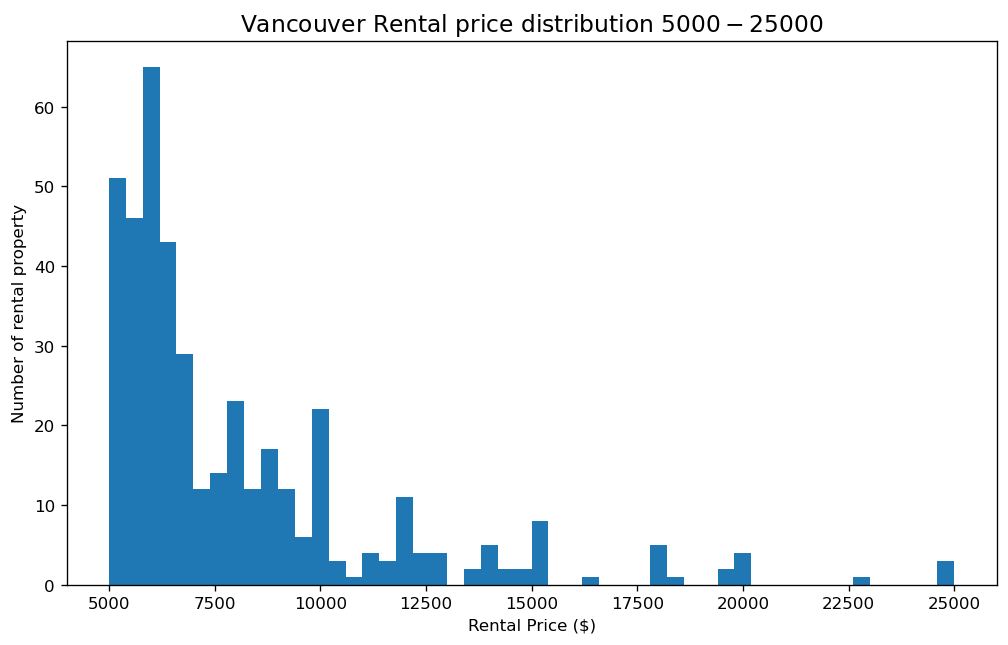

In [35]:
# What about distribution $5000 and up?
price_range = (5000, df["Price"].max())
plt.hist(df["Price"], bins=50, range=price_range)
plt.title(f'{city} Rental price distribution ${price_range[0]} - ${price_range[1]}', fontsize=14)
plt.xlabel("Rental Price ($)")
plt.ylabel("Number of rental property");

In [36]:
# Get URL on 2 Bedroom suite in top 100. 
highest_two_bed = top_100_price[top_100_price['Bedroom'] == 2]
highest_two_bed_idx = highest_two_bed.index
for idx in highest_two_bed_idx:
    print(f'Index Number - {idx} : {df.loc[idx]["Post URL"]}')


Index Number - 1203 : https://vancouver.craigslist.org/van/apa/d/vancouver-furnished-two-bedroom-sub/7560020204.html
Index Number - 2491 : https://vancouver.craigslist.org/van/apa/d/vancouver-vancouver-downtown-fairmont/7554964282.html
Index Number - 2925 : https://vancouver.craigslist.org/van/apa/d/rare-harbour-green-one-ft-stunning/7563703745.html
Index Number - 1175 : https://vancouver.craigslist.org/van/apa/d/vancouver-uniqueaccommodationscom/7567894912.html
Index Number - 791 : https://vancouver.craigslist.org/van/apa/d/vancouver-breathtaking-views-2500-sq-ft/7570816160.html
Index Number - 1114 : https://vancouver.craigslist.org/van/apa/d/vancouver-super-luxury-07-fairmont-bed/7565383014.html
Index Number - 407 : https://vancouver.craigslist.org/van/apa/d/vancouver-luxurious-private-estates-of/7571084372.html
Index Number - 444 : https://vancouver.craigslist.org/van/apa/d/vancouver-br-den-for-lease-across/7571047691.html
Index Number - 1359 : https://vancouver.craigslist.org/van/a

#### What is 0.85% RULE?

This is the rough calculation to find out the purchase price to give 5 - 8% cash flow from your rental revenue with today's motgagerate. It's not accurate number but great place to start evaluating the home price for your investment. 

In [37]:
# Average Price on those pent house
avg_rent = np.average(highest_two_bed["Price"][1:].to_numpy())
max_rent = np.max(highest_two_bed["Price"][1:].to_numpy())
# 0.85% RULE
avg_house_p = np.round(avg_rent / (0.85/100), 2)
max_house_p = np.round(max_rent / (0.85/100), 2)
print(f"Price between ${avg_house_p*0.8} - ${max_house_p}")

Price between $1108542.2 - $2117647.06


In [38]:
# Rental price higher than $5000.
more_than_5000 = df[df["Price"] > 5000]
more_than_5000.groupby(by=["Bedroom", "IsFurnished"]).agg({'SQFT': ["min", "max"],
                                                         "Price": ['min', 'max', 'count']})

SQFT           Price             
                        min      max    min    max count
Bedroom IsFurnished                                     
0       True         1357.0   1357.0   8000   8000     1
1       False        2000.0   2000.0   6500   6500     1
        True          900.0   1855.0   5500   8500     3
2       False         675.0   2936.0   5190  18000    89
        True          800.0   2873.0   5100  25000    69
3       False          14.0   4000.0   5100  20000    79
        True         1000.0   4000.0   5200  24995    33
4       False        1312.0   6300.0   5200  25000    38
        True         1600.0   6800.0   5500  18500    18
5       False        1500.0   6426.0   5200  19500    26
        True         2250.0   6500.0   6088  14995     9
6       False        2300.0  10098.0   5600  16500    11
        True         3000.0  29789.0   5600  22880     7
7       False        2900.0   4800.0   6500   9995     5
        True         6000.0   6000.0  19995  19995     1
8       False        4980.0   4980.0   7900   7900     1

In [39]:
# top 10 most expensive rental in Vancouver
top_10 = top_100_price.head(10)
top_10

,Post Datetime,Neighborhood,Bedroom,SQFT,Price,IsFurnished
2147,2022-12-12 10:56:00,vancouver,4,3958.0,25000,False
1203,2022-12-20 11:11:00,vancouver,2,2694.0,25000,True
535,2022-12-22 09:51:00,vancouver,3,2223.0,24995,True
1355,2022-12-19 12:19:00,vancouver,6,10000.0,22880,True
2032,2022-12-13 08:57:00,vancouver,3,3636.0,20000,False
367,2022-12-22 15:46:00,dowtown,4,3700.0,19998,False
157,2022-12-23 09:06:00,vancouver,7,6000.0,19995,True
142,2022-12-23 09:30:00,vancouver,3,3600.0,19975,False
368,2022-12-22 15:46:00,vancouver,3,3600.0,19750,False
710,2022-12-21 19:42:00,shaughnessy,5,6426.0,19500,False


In [40]:
# Then get the URL on those top 10 most expensive rental in Vancouver. 
top_10_idx = top_10.index
for idx in top_10_idx:
    print(f'Index Number - {idx}/Number of Bedroom - {df.loc[idx]["Bedroom"]}/SQFT - {df.loc[idx]["SQFT"]}/Location - {df.loc[idx]["Neighborhood"]}\n{df.loc[idx]["Post URL"]}')

Index Number - 2147/Number of Bedroom - 4/SQFT - 3958.0/Location - vancouver
https://vancouver.craigslist.org/van/apa/d/vancouver-ultra-customized-morden/7567534610.html
Index Number - 1203/Number of Bedroom - 2/SQFT - 2694.0/Location - vancouver
https://vancouver.craigslist.org/van/apa/d/vancouver-furnished-two-bedroom-sub/7560020204.html
Index Number - 535/Number of Bedroom - 3/SQFT - 2223.0/Location - vancouver
https://vancouver.craigslist.org/van/apa/d/vancouver-luxury-furnished-bed-den-bath/7568077632.html
Index Number - 1355/Number of Bedroom - 6/SQFT - 10000.0/Location - vancouver
https://vancouver.craigslist.org/van/apa/d/west-vancouver-furnished-luxury-mansion/7562366149.html
Index Number - 2032/Number of Bedroom - 3/SQFT - 3636.0/Location - vancouver
https://vancouver.craigslist.org/van/apa/d/vancouver-coal-harbour-luxury-three/7563551392.html
Index Number - 367/Number of Bedroom - 4/SQFT - 3700.0/Location - dowtown 
https://vancouver.craigslist.org/van/apa/d/vancouver-one-of

From above data, Downtown Vanvouver rental market is different world. I must make decision to define what is the outlier of high-end rental. 

If the number of the high-end prices are large enough, I can make DataFrame for only high-end and search for the high-end market opportunities. 

Clearly, I should not mix with regular market and high-end market because it will provide me biased price average to determin the valuse of the house. 

I am wondering that <a href='https://www03.cmhc-schl.gc.ca/hmip-pimh/en/TableMapChart/Table?TableId=2.1.31.3&GeographyId=2410&GeographyTypeId=3&DisplayAs=Table&GeograghyName=Vancouver'>CMHC Vancouver rental market report</a> concerns about those outliers. 

## Analyze - 2 


## Analyze under 5000, and i call them for regular market. 
* What is the percentage of the Furnished rental suite? 
* Is there any price different? 
* How many bedroom suite has most on ads? And is it any different in area?
* How much is the rental price in general? 


Tne price around $100 is most likely daily rental so I will store in different variable so I might be able to do something with them. 

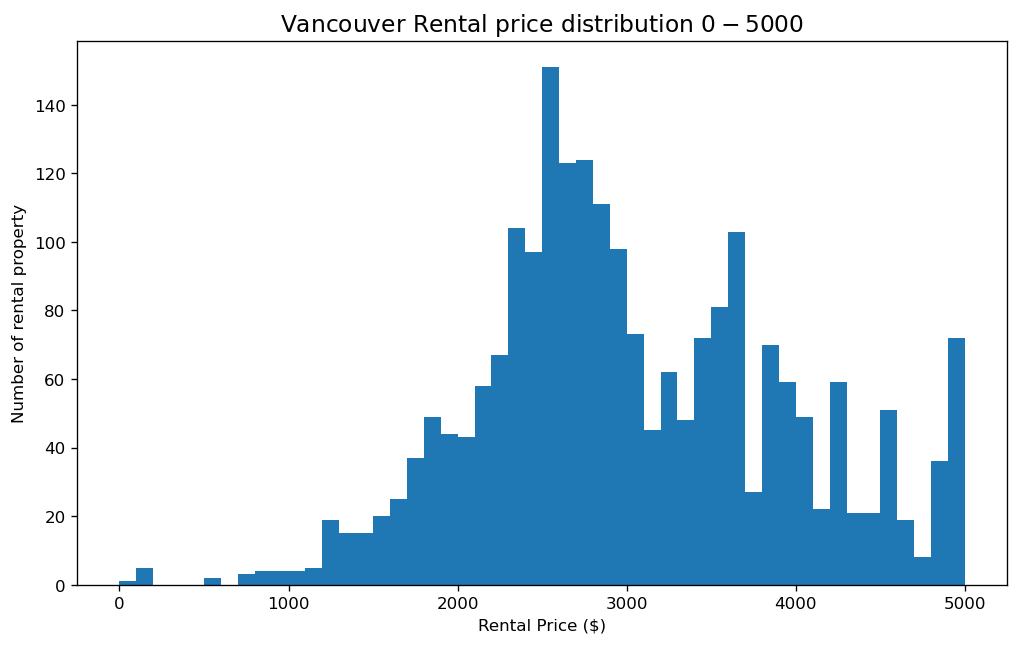

In [41]:
# What about distribution $0 - $5000?
price_range = (0, 5000)
plt.hist(df["Price"], bins=50, range=price_range)
plt.title(f'{city} Rental price distribution ${price_range[0]} - ${price_range[1]}', fontsize=14)
plt.xlabel("Rental Price ($)")
plt.ylabel("Number of rental property");

In [42]:
day_rental = df[df["Price"].between(10, 300)]
day_rental

,PostAreaCode,Post Datetime,Post Date,Post Time,Post Title,Post URL,Neighborhood,Bedroom,SQFT,Price,IsFurnished,Price/SQFT
1644,VANVAN,2022-12-16 18:53:00,2022-12-16,18:53:00,New basement suite in Riley Park Neighbourhood,https://vancouver.craigslist.org/van/apa/d/van...,riley park,1,NaN,140,False,NaN
2131,VANVAN,2022-12-12 13:20:00,2022-12-12,13:20:00,Vancouver Furnished Master Bedroom for Rent,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,1,400.0,120,True,0.300000
2549,VANVAN,2022-12-06 21:27:00,2022-12-06,21:27:00,Sublet available Vancouver Dec 19th to Jan 2nd,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,1,NaN,90,False,NaN
2803,VANVAN,2022-12-04 15:12:00,2022-12-04,15:12:00,DT One Bedroom One Bath Furnished Dec 21-29 2022,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,1,650.0,100,True,0.153846
2982,VANVAN,2022-11-30 20:47:00,2022-11-30,20:47:00,1 Bedroom suite furnished,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,1,450.0,150,True,0.333333
3030,VANVAN,2022-11-29 22:17:00,2022-11-29,22:17:00,Bright Apartment to rent,https://vancouver.craigslist.org/van/apa/d/van...,kitsilano,1,NaN,100,False,NaN


In [43]:
# Drop the rental price over $5000. 
under_5000 = df.drop(more_than_5000.index, axis=0)
print(f'Drop {len(more_than_5000)} rows and data contains {len(under_5000)} rows of data.')

Drop 391 rows and data contains 2226 rows of data.


In [44]:
# then also drop daily rentals
under_5000 = under_5000.drop(day_rental.index, axis=0)
print(f'Drop {len(day_rental)} rows and data contains {len(under_5000)} rows of data.')

Drop 6 rows and data contains 2220 rows of data.


In [45]:
# What is the top 10 highest price on under $5000. Is it no outlier?
under_5000.sort_values(by="Price", ascending=False).head(10)

,PostAreaCode,Post Datetime,Post Date,Post Time,Post Title,Post URL,Neighborhood,Bedroom,SQFT,Price,IsFurnished,Price/SQFT
724,VANVAN,2022-12-21 18:59:00,2022-12-21,18:59:00,FRASER AND 41ST VANCOUVER EAST HOUSE 3 BED 2 BATH,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,3,2000.0,5000,False,2.500000
2136,VANVAN,2022-12-12 12:24:00,2022-12-12,12:24:00,Yaletown fully furnished 3 bedroom sub-penthou...,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,3,1980.0,5000,True,2.525253
2190,VANVAN,2022-12-11 21:20:00,2022-12-11,21:20:00,NEW BUILDING-Available February 1st -Pet Frien...,https://vancouver.craigslist.org/van/apa/d/van...,downtown,3,745.0,5000,False,6.711409
2191,VANVAN,2022-12-11 21:18:00,2022-12-11,21:18:00,Available February 1st - NEW BUILDING Pet Frie...,https://vancouver.craigslist.org/van/apa/d/van...,downtown,3,745.0,5000,False,6.711409
226,VANVAN,2022-12-22 23:12:00,2022-12-22,23:12:00,"Eco Penthouse Loft, with Private Roof Deck",https://vancouver.craigslist.org/van/apa/d/van...,west side - kitsilano,2,900.0,5000,False,5.555556
2794,VANVAN,2022-12-04 17:53:00,2022-12-04,17:53:00,2BD 2BATH Fully furnished | Iconic Wall Centr...,https://vancouver.craigslist.org/van/apa/d/van...,downtown,2,1067.0,5000,True,4.686036
1661,VANVAN,2022-12-16 17:36:00,2022-12-16,17:36:00,A/C Pet friendly Apartment at Cambie Gardens 7...,https://vancouver.craigslist.org/van/apa/d/van...,oakridge,2,1155.0,5000,False,4.329004
390,VANVAN,2022-12-22 14:37:00,2022-12-22,14:37:00,(UniqueAccommodations.com) ID:5184 Kitsilano 2...,https://vancouver.craigslist.org/van/apa/d/van...,kitsilano,2,1100.0,5000,False,4.545455
1675,VANVAN,2022-12-16 17:36:00,2022-12-16,17:36:00,A/C Furnished all inclusive Apartment SMART55 ...,https://vancouver.craigslist.org/van/apa/d/van...,downtown,2,1067.0,5000,True,4.686036
1163,VANVAN,2022-12-20 12:27:00,2022-12-20,12:27:00,(UniqueAccommodations.com) ID:4949 4 BED rare ...,https://vancouver.craigslist.org/van/apa/d/van...,cambie,4,1839.0,5000,False,2.718869


In [46]:
# How many rentals are $5000?
under_5000[under_5000["Price"] == 5000] 

,PostAreaCode,Post Datetime,Post Date,Post Time,Post Title,Post URL,Neighborhood,Bedroom,SQFT,Price,IsFurnished,Price/SQFT
145,VANVAN,2022-12-23 09:22:00,2022-12-23,09:22:00,5 star luxury Shangri-La hotel condo(furnished...,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,2,1045.0,5000,False,4.784689
226,VANVAN,2022-12-22 23:12:00,2022-12-22,23:12:00,"Eco Penthouse Loft, with Private Roof Deck",https://vancouver.craigslist.org/van/apa/d/van...,west side - kitsilano,2,900.0,5000,False,5.555556
390,VANVAN,2022-12-22 14:37:00,2022-12-22,14:37:00,(UniqueAccommodations.com) ID:5184 Kitsilano 2...,https://vancouver.craigslist.org/van/apa/d/van...,kitsilano,2,1100.0,5000,False,4.545455
458,VANVAN,2022-12-22 11:32:00,2022-12-22,11:32:00,Spacious 3 Bedroom + Den Available for Lease,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,3,1200.0,5000,False,4.166667
724,VANVAN,2022-12-21 18:59:00,2022-12-21,18:59:00,FRASER AND 41ST VANCOUVER EAST HOUSE 3 BED 2 BATH,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,3,2000.0,5000,False,2.500000
731,VANVAN,2022-12-21 18:39:00,2022-12-21,18:39:00,(ORCA_REF#1101-1000)2 bdrm 2 bath apt,https://vancouver.craigslist.org/van/apa/d/van...,downtown,2,1350.0,5000,False,3.703704
1086,VANVAN,2022-12-20 15:48:00,2022-12-20,15:48:00,2 BED + DEN W/ VIEWS FOR RENT @ CIELO!!,https://vancouver.craigslist.org/van/apa/d/van...,coal harbour,2,1277.0,5000,False,3.915427
1163,VANVAN,2022-12-20 12:27:00,2022-12-20,12:27:00,(UniqueAccommodations.com) ID:4949 4 BED rare ...,https://vancouver.craigslist.org/van/apa/d/van...,cambie,4,1839.0,5000,False,2.718869
1330,VANVAN,2022-12-19 14:14:00,2022-12-19,14:14:00,"--(OBsold.com)-- Stunning Furnished 1bd+den, m...",https://vancouver.craigslist.org/van/apa/d/nor...,lower lonsdale,1,733.0,5000,True,6.821282
1525,VANVAN,2022-12-18 16:28:00,2022-12-18,16:28:00,Luxury modern new furnished Vancouver Suite,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,2,950.0,5000,True,5.263158


In [47]:
# What is the cheapest rent?
under_5000.sort_values(by="Price").head(20)

,PostAreaCode,Post Datetime,Post Date,Post Time,Post Title,Post URL,Neighborhood,Bedroom,SQFT,Price,IsFurnished,Price/SQFT
2184,VANVAN,2022-12-11 21:39:00,2022-12-11,21:39:00,Double Car Garage for rent !!,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,0,400.0,550,False,1.375000
1541,VANVAN,2022-12-18 12:44:00,2022-12-18,12:44:00,Rooms in SRO building from $595,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,1,NaN,595,False,NaN
1719,VANVAN,2022-12-16 09:08:00,2022-12-16,09:08:00,Microsuite Available Now,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,1,150.0,700,False,4.666667
2871,VANVAN,2022-12-03 08:11:00,2022-12-03,08:11:00,1 bedroom available for rent in a shared suite,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,1,650.0,700,False,1.076923
1159,VANVAN,2022-12-20 12:44:00,2022-12-20,12:44:00,Nice and cozy room available (H65) (Surrey),https://vancouver.craigslist.org/van/apa/d/sur...,surrey,1,NaN,700,False,NaN
1078,VANVAN,2022-12-20 16:32:00,2022-12-20,16:32:00,1 bedroom in house,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,5,NaN,800,False,NaN
716,VANVAN,2022-12-21 19:40:00,2022-12-21,19:40:00,Room for rent $830/month! utilities & internet...,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,1,997.0,830,False,0.832497
303,VANVAN,2022-12-22 19:10:00,2022-12-22,19:10:00,Good location Bachelor unit in,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,0,NaN,850,False,NaN
693,VANVAN,2022-12-21 20:23:00,2022-12-21,20:23:00,Great location/ Fraser/63,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,0,NaN,850,False,NaN
1707,VANVAN,2022-12-16 11:50:00,2022-12-16,11:50:00,student accommodation,https://vancouver.craigslist.org/van/apa/d/van...,vancouver,1,800.0,900,False,1.125000


In [48]:
# Count how many rentals are furnished 
num_furnished_suite = df[df['IsFurnished'] == True]["IsFurnished"].count()
num_unfurnished_suite = len(df) - num_furnished_suite
furnished_suite_percent = np.round((num_furnished_suite / len(df)) * 100, 2)
print(f"Number of furnished suite is {num_furnished_suite}, and it's {furnished_suite_percent}% of the entire list.")

Number of furnished suite is 642, and it's 24.53% of the entire list.


In [49]:
# Find out the number of ads on each bedrooms number.  
num_bed = np.sort(df["Bedroom"].unique())
suite_counts = []
for i in range(len(num_bed)):
    suite_count = len(df[df['Bedroom'] == num_bed[i]])
    suite_counts.append(suite_count)
    #print(f'Number of {num_bed[i]} Bedroom suite: {len(df[df["Bedroom"] == num_bed[i]])}')
#print(f"List of suite counts: {suite_counts}")

In [50]:
# Find out Mean, Max, Min of SQFT and Price of each bedroom and SUM of furnished suite and total suite on each bedroom. 
df_count = df.groupby(by=['Bedroom']).agg({'SQFT': ['mean', 'max', 'min'],
                                                 'Price': ['mean', 'max', 'min'],
                                                  'IsFurnished': ['sum', 'count']})
df_count['percent furnished'] = df_count['IsFurnished']['sum'] / df_count["IsFurnished"]['count']
df_count

SQFT                         Price              IsFurnished  \
                mean      max     min         mean    max   min         sum   
Bedroom                                                                       
0         437.523179   1357.0   103.0  2314.693642   8000   550          52   
1         620.058978   2400.0     1.0  2555.504566   8500    90         247   
2         987.245245   2936.0     7.0  3958.789091  25000   990         251   
3        1548.236364   4000.0    14.0  5512.531773  24995  1000          55   
4        2620.298851   6800.0   900.0  6909.103093  25000  2300          20   
5        3712.675000   6500.0  1500.0  8274.022727  19500   800           9   
6        6675.777778  29789.0  2300.0  9518.750000  22880   950           7   
7        4028.333333   6000.0  1300.0  8798.571429  19995  1300           1   
8        4980.000000   4980.0  4980.0  7900.000000   7900  7900           0   

              percent furnished  
        count                    
Bedroom                          
0         173          0.300578  
1         876          0.281963  
2        1100          0.228182  
3         299          0.183946  
4          97          0.206186  
5          44          0.204545  
6          20          0.350000  
7           7          0.142857  
8           1          0.000000

In [51]:
# Price per furnished suit on each bedroom
#df_price_furnished = df.drop(['Post Datetime', 'Post Title', 'Post URL', 'Neighborhood'], axis=1)
df_price_furnished = df.groupby(['Bedroom', 'IsFurnished']).agg({'Price': ['mean', 'max', 'min', 'count'],
                                                               "SQFT": ['mean', 'max', 'min']})
df_price_furnished

Price                              SQFT           \
                             mean    max    min count          mean      max   
Bedroom IsFurnished                                                            
0       False         2213.652893   4050    550   121    433.480769   1200.0   
        True          2549.807692   8000   1590    52    446.468085   1357.0   
1       False         2411.798092   6500     90   629    622.535316   2400.0   
        True          2921.461538   8500    100   247    614.137778   1855.0   
2       False         3742.355713  18000    990   849    974.216993   2936.0   
        True          4690.868526  25000   1175   251   1029.837607   2873.0   
3       False         5143.799180  20000   1000   244   1516.864865   4000.0   
        True          7148.363636  24995   2500    55   1679.641509   4000.0   
4       False         6357.831169  25000   2300    77   2572.911765   6300.0   
        True          9031.500000  18500   4800    20   2789.894737   6800.0   
5       False         7982.400000  19500    800    35   3722.096774   6426.0   
        True          9408.111111  14995   6088     9   3680.222222   6500.0   
6       False         8261.538462  16500    950    13   5003.000000  10098.0   
        True         11853.571429  22880   5600     7  10021.333333  29789.0   
7       False         6932.500000   9995   1300     6   3634.000000   4800.0   
        True         19995.000000  19995  19995     1   6000.000000   6000.0   
8       False         7900.000000   7900   7900     1   4980.000000   4980.0   

                             
                        min  
Bedroom IsFurnished          
0       False         103.0  
        True          180.0  
1       False           1.0  
        True          361.0  
2       False           7.0  
        True          500.0  
3       False          14.0  
        True          781.0  
4       False         900.0  
        True         1450.0  
5       False        1500.0  
        True         2250.0  
6       False        2300.0  
        True         3000.0  
7       False        1300.0  
        True         6000.0  
8       False        4980.0

Dropped extrimely low price add, and it seems no outlier on the price

In [52]:
# Count how many ads per day.1=Mon, 2=Tue, ......, 7=Sun
df["Weekday"] = df["Post Datetime"].dt.isocalendar().day
num_ad_per_day_df = df.groupby('Post Date').agg({'Post Title': 'count',
                                                "Weekday": 'first'})

num_ad_per_day_df

,Post Title,Weekday
Post Date,,
2022-11-29,24,2
2022-11-30,40,3
2022-12-01,50,4
2022-12-02,42,5
2022-12-03,40,6
2022-12-04,44,7
2022-12-05,105,1
2022-12-06,71,2
2022-12-07,62,3


Which day of the week have more ads? 

Is there any day of the week that having more ads than others? 

## Share

#### Data Visualization:
The most important thing is what information do I want to tell. 

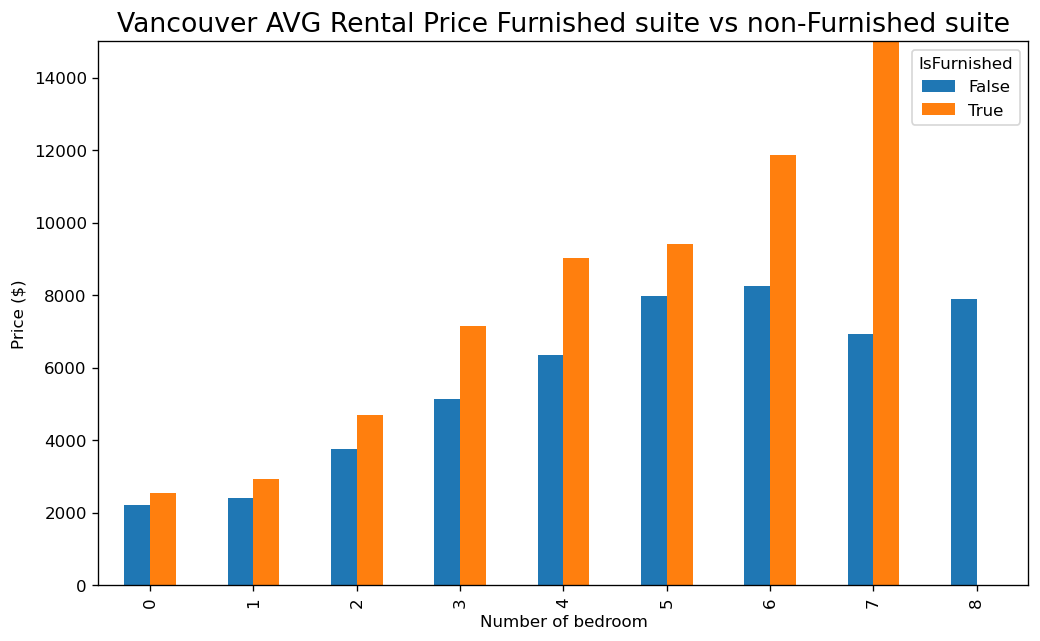

In [53]:
df_price_furnished["Price"]["mean"].unstack().plot(kind='bar')
plt.title(f'{city} AVG Rental Price Furnished suite vs non-Furnished suite', fontsize=16)
plt.xlabel('Number of bedroom')
plt.ylabel('Price ($)')
plt.ylim((0, 15000));

In [54]:
titles = []
for title in df["Post Title"][:5]:
    titles.append(title)
titles

['Unfurnished Townhouse - 2 Bed + Den - 1 Bath in Yaletown',
 'One bedroom Garden Suite for Rent',
 'PET FRIENDLY 1 Bedroom Apartment, Private Balcony, Downtown Vancouver',
 'Stunning 3 Bedroom 3 Bathroom Furnished Home #870',
 'Unique 1 Bd+den+solarium on 2137 W 10th Kistilano Vancouver']

In [55]:
df[['Post Datetime', 'Post Title', "Price", "Bedroom", "IsFurnished"]][:10]

,Post Datetime,Post Title,Price,Bedroom,IsFurnished
0,2022-12-23 13:57:00,Unfurnished Townhouse - 2 Bed + Den - 1 Bath i...,3695,2,False
1,2022-12-23 13:56:00,One bedroom Garden Suite for Rent,2155,1,False
2,2022-12-23 13:55:00,"PET FRIENDLY 1 Bedroom Apartment, Private Balc...",2350,1,False
3,2022-12-23 13:47:00,Stunning 3 Bedroom 3 Bathroom Furnished Home #870,6500,3,True
4,2022-12-23 13:46:00,Unique 1 Bd+den+solarium on 2137 W 10th Kistil...,2450,1,False
5,2022-12-23 13:45:00,Spacious Furnished 1 Bedroom Condo for Rent in...,2900,1,True
6,2022-12-23 13:43:00,Garden-Level Furnished 1 Bedroom Suite in Kits...,3200,1,True
7,2022-12-23 13:43:00,Elegant Bright 1 Bedroom Furnished Apartment D...,3500,1,True
8,2022-12-23 13:42:00,3 Bedroom Furnished Apartment in Kitsilano #447,5595,3,True
9,2022-12-23 13:40:00,Two Bedroom Furnished Apartment Suite in Resto...,4495,2,True


In [56]:
np.mean(df["Price/SQFT"])

5.214743680566932

## Act